In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
img_path = "../output/cropped_img.jpg"

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


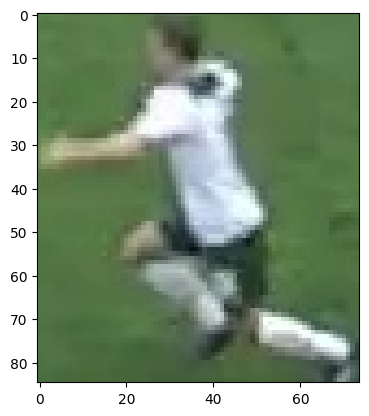

In [5]:
plt.imshow(image)
plt.show()

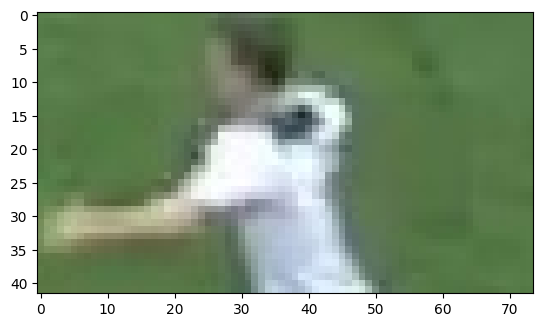

In [7]:
# Take top half because we need the color of the t-shirt.

image_top_half = image[0:int(image.shape[0]/2),:]
plt.imshow(image_top_half)
plt.show()

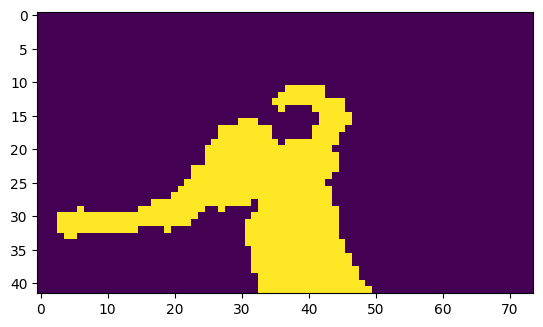

In [13]:
# Too much background color, hence we cluster the image into 2 cluster

# Reshape into 2d array
image_2d = image_top_half.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get labels
labels = kmeans.labels_

# Reshape the labels into the original image shape

clustered_image = labels.reshape(image_top_half.shape[0],image_top_half.shape[1])

# Display

plt.imshow(clustered_image)
plt.show()

### We dont know what the labels for background or t-shirt are out of the two unless we plot it. Hence we check the corners becuase in most cases, the corners will have the background

In [15]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1],clustered_image[-1,0],clustered_image[1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

In [22]:
print(non_player_cluster)

0


In [24]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [25]:
kmeans.cluster_centers_[player_cluster]

array([198.61851852, 208.69444444, 211.14814815])